In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("data/recipes_muffins_cupcakes.csv")

In [9]:
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


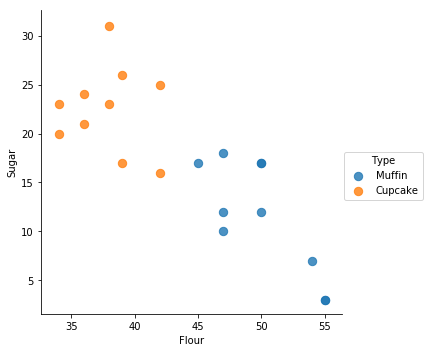

In [17]:
sns.lmplot('Flour', 'Sugar', data=df, hue = 'Type', fit_reg = False)

In [18]:
flour_sugar = df[['Flour','Sugar']].as_matrix()

In [41]:
type_label = np.where(df['Type'] == 'Muffin','no','yes')

In [42]:
type_label

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype='<U3')

In [62]:
model = svm.SVC(kernel = 'linear')
model.fit(flour_sugar, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
#weights of the features
wt = model.coef_[0]
#slope
m = -wt[0] / wt[1]
#Return evenly spaced numbers over a specified interval
xx = np.linspace(30,60)
#constant 
b = model.intercept_[0]
#y = m*x+b
yy = m * xx - b/wt[1]



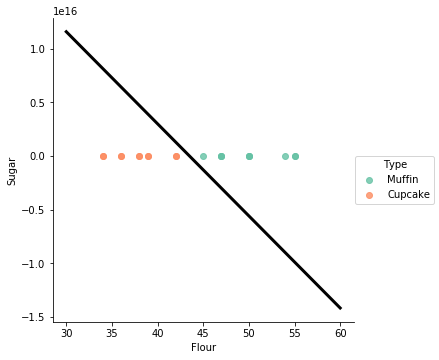

In [114]:
#plot the hyperplane
sns.lmplot('Flour','Sugar', data=df, fit_reg = False, palette = 'Set2', hue = 'Type')
plt.plot(xx, yy, linewidth=3, color='black')

In [115]:
# margins


#sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
#plt.plot(xx, yy, linewidth=2, color='black')
model.support_vectors_


array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [116]:
down = model.support_vectors_[0]
up = model.support_vectors_[-1]
yy_down = m * xx + (down[1] - m * down[0])
yy_up = m * xx + (up[1] - m * up[0])

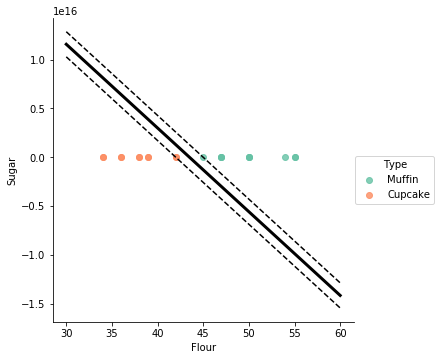

In [119]:
#plot the hyperplane
sns.lmplot('Flour','Sugar', data=df, fit_reg = False, palette = 'Set2', hue = 'Type')
plt.plot(xx, yy, linewidth=3, color='black')
# margins
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [121]:
# function to predict whether the given recipe is for muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 'no':
        print("Muffin Recipe")
    else:
        print("Cupcake Recipe")

In [125]:
muffin_or_cupcake(100,100)

Muffin Recipe


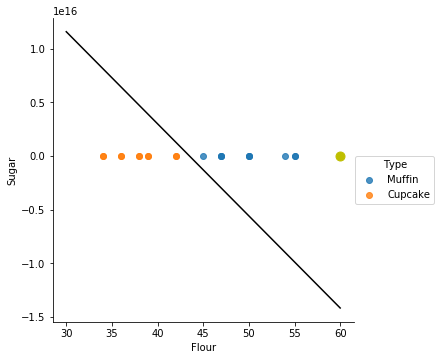

In [143]:
# plot new point
sns.lmplot('Flour', 'Sugar', data= df, hue='Type', fit_reg=False)
plt.plot(xx, yy, color='black')
plt.plot(60,50,'yo', markersize='9')